## Matala 2

#### Reading file

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import re
data=pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data = pd.DataFrame(data)

C:\Users\berber\AppData\Local\Temp\ipykernel_2772\2451443036.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('matala2_cosmetics_2019-Nov.csv')


### Q.1

In [6]:
#change type to date
data['event_time'] = pd.to_datetime(data['event_time'])
# Sort dataframe by user_session and event_time
data.sort_values(by=['user_session', 'event_time'], inplace=True)
#calculate the time between events
data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.total_seconds()
# For the last event in the visit, set duration_to_next_event to 0
data.loc[data.groupby('user_session').tail(1).index, 'duration_to_next_event'] = 0
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
522763,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
1443597,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0
1933123,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0
1662416,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0
1800687,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0
...,...,...,...,...,...,...,...,...,...,...
4601243,2019-11-30 19:03:25+00:00,remove_from_cart,5754302,1487580009286598681,NaN,lianail,1.78,391748818,NaN,NaN
4601283,2019-11-30 19:03:36+00:00,remove_from_cart,5760335,1487580009261432856,NaN,zinger,1.9,391748818,NaN,NaN
4601318,2019-11-30 19:03:44+00:00,remove_from_cart,5694465,1487580008112194531,NaN,NaN,4.68,391748818,NaN,NaN
4601352,2019-11-30 19:03:56+00:00,remove_from_cart,5788423,1487580007306888126,NaN,NaN,3.33,391748818,NaN,NaN


### Q.2 + Q.3

In [7]:
#sort dataframe by user_id and event_tinme
data.sort_values(by=['user_id', 'event_time'], inplace=True)
#calculate the days between events
data['days_diff'] = (data['event_time'] - data.groupby('user_id')['event_time'].shift(1)).dt.days
#funnel number
data['funnel_number'] = (data['days_diff'].gt(5)).cumsum()+1

###Q3###

data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1
data.drop('days_diff',axis='columns', inplace=True)
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,39597,3
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,39597,4
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,39597,5
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,39597,1


### Q.4

In [8]:
def remove_non_numeric(string):
    #Remove all non-numeric characters from a string, except for the dot character.
    pattern = r'[^0-9.]'  # Match any character that is not a digit or a dot
    cleaned_string = re.sub(pattern, '', string)
    return cleaned_string

In [9]:
# Apply the function to the "price" column in the DataFrame
data['price'] = data['price'].astype(str).apply(remove_non_numeric)
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,39597,3
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,39597,4
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,39597,5
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,39597,1


### Q.5

In [10]:
# Create an empty dictionary to store the counts
event_type_counts = {}

# Loop through the 'event_type' column and update the dictionary with counts
for event in data['event_type']:
    if event in event_type_counts:
        event_type_counts[event] += 1
    else:
        event_type_counts[event] = 1

print(event_type_counts)

{'view': 2076132, 'cart': 1311807, 'remove_from_cart': 925481, 'purchase': 322417}


<function matplotlib.pyplot.show(close=None, block=None)>

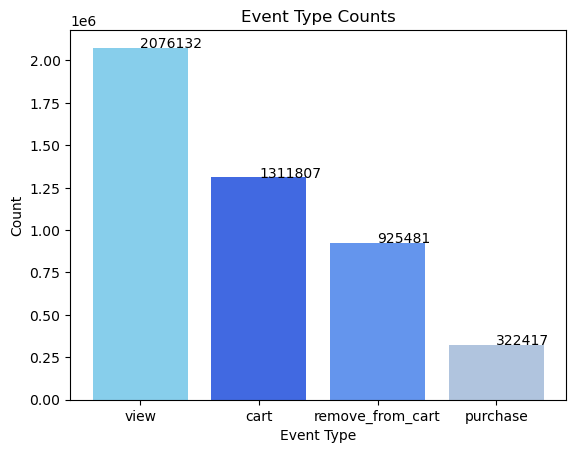

In [11]:
import matplotlib.pyplot as plt
x=list(event_type_counts.keys())
y=list(event_type_counts.values())
plt.bar(x, y,color=['skyblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Event Type Counts')

for index,data in enumerate(y):
    plt.text(x=index, y =data, s=f"{data}", fontdict=dict(fontsize=10))

plt.show

### Q.6

In [12]:
import pandas as pd
data=pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data = pd.DataFrame(data)
# Convert 'event_time' to datetime
data['event_time'] = pd.to_datetime(data['event_time'])
# Create session_data dataframe
session_data = data.groupby(['user_id', 'user_session']).agg({
    'event_type': 'count',  # e. Total number of events
    'event_time': lambda x: (x.max() - x.min()).seconds,  # f. Duration of visit in seconds
    'product_id': lambda x: x.unique().tolist()  #g. Unique list of products viewed
}).reset_index()

# Reset index
session_data.reset_index(drop=True, inplace=True)

# Display session_data dataframe
session_data

C:\Users\berber\AppData\Local\Temp\ipykernel_2772\1430163175.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('matala2_cosmetics_2019-Nov.csv')


,user_id,user_session,event_type,event_time,product_id
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,0,[5240]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,0,[5814066]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,28,3789,"[5800358, 5800349, 5712576, 5905673, 5727766, ..."
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,0,[5711087]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,0,[5711145]
...,...,...,...,...,...
942067,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,0,[5881428]
942068,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,0,[5873630]
942069,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,5,38,"[5892179, 5886282, 5900651]"
942070,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,0,[5790563]


In [13]:
#c. Add funnel_number column
session_data['funnel_number'] = session_data.groupby('user_id').cumcount() + 1
session_data

,user_id,user_session,event_type,event_time,product_id,funnel_number
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,0,[5240],1
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,0,[5814066],1
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,28,3789,"[5800358, 5800349, 5712576, 5905673, 5727766, ...",2
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,0,[5711087],3
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,0,[5711145],4
...,...,...,...,...,...,...
942067,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,0,[5881428],1
942068,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,0,[5873630],1
942069,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,5,38,"[5892179, 5886282, 5900651]",1
942070,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,0,[5790563],1


In [14]:
#d. Add index_in_funnel column
session_data['index_in_funnel'] = session_data.groupby('user_id').cumcount() + 1
session_data

,user_id,user_session,event_type,event_time,product_id,funnel_number,index_in_funnel
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,0,[5240],1,1
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,0,[5814066],1,1
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,28,3789,"[5800358, 5800349, 5712576, 5905673, 5727766, ...",2,2
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,0,[5711087],3,3
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,0,[5711145],4,4
...,...,...,...,...,...,...,...
942067,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,0,[5881428],1,1
942068,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,0,[5873630],1,1
942069,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,5,38,"[5892179, 5886282, 5900651]",1,1
942070,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,0,[5790563],1,1


In [15]:
#h. Define custom function to get list of product IDs for cart events
def get_list_of_added_to_cart(x):
    return data[(data['user_id'] == x['user_id']) & (data['user_session'] == x['user_session']) & (data['event_type'] == 'cart')]['product_id'].tolist()


In [ ]:
# Add list_of_added_to_cart column
session_data['list_of_added_to_cart'] = session_data.apply(get_list_of_added_to_cart, axis=1)
session_data

In [ ]:
#i. Define custom function to get list of product IDs for purchase events
def get_list_of_purchased(x):
    return data[(data['user_id'] == x['user_id']) & (data['user_session'] == x['user_session']) & (data['event_type'] == 'purchase')]['product_id'].tolist()


In [ ]:
# Add list_of_purchased column
session_data['list_of_purchased'] = session_data.apply(get_list_of_purchased, axis=1)
session_data